# Exploratory Data Analysis Notebook

## Contents

- Import Libaries
- Data & Features
- Exploratory Data Analysis (EDA)
    - Funtions
    - Shape & Size
    - Information & Statistical Summary
    - Unique & Missing Values
    - Categoriacal & Numerical Variables
    - Tableue Visualization
    - Class imbalance
    - Correlation
    - Outliers

## Import Libaries

In [2]:
import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
sns.set(style="darkgrid")

## Data & Features

In [4]:
path = "../data/bank+marketing/bank-additional/bank-additional/bank-additional-full.csv"
df = pd.read_csv(path, sep=';')

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Description of Features of the Dataset

- age : (numeric)

- job : type of job (categorical: 'admin.','blue collar','entrepreneur','housemaid','management','retired','self employed','services','student','technician','unemployed','unknown')

- marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

- education (categorical): 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown'

- default: has credit in default? (categorical: 'no','yes','unknown')

- housing: has housing loan? (categorical: 'no','yes','unknown')

- loan: has personal loan? (categorical: 'no','yes','unknown')

- related with the last contact of the current campaign:

- contact: contact communication type (categorical: 'cellular','telephone')

- month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

- day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

- duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### other attributes:

- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

- previous: number of contacts performed before this campaign and for this client (numeric)

- poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

### social and economic context attributes

- emp.var.rate: employment variation rate - quarterly indicator (numeric)

- cons.price.idx: consumer price index - monthly indicator (numeric)

- cons.conf.idx: consumer confidence index - monthly indicator (numeric)

- euribor3m: euribor 3 month rate - daily indicator (numeric)

- nr.employed: number of employees - quarterly indicator (numeric)

### Output variable (desired target):

y - has the client subscribed to a term deposit? (binary: 'yes','no')

## Exploratory Data Analysis


### Shape and Size

In [6]:
print("shape:",df.shape)
print('size:',df.size)

shape: (41188, 21)
size: 864948


### Information and Statistical summary

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [9]:
cols = df.columns
for i in cols:
    if df[i].dtype == 'O':
        print('Unique values in',i,'are',df[i].unique())

Unique values in job are ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
Unique values in marital are ['married' 'single' 'divorced' 'unknown']
Unique values in education are ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
Unique values in default are ['no' 'unknown' 'yes']
Unique values in housing are ['no' 'yes' 'unknown']
Unique values in loan are ['no' 'yes' 'unknown']
Unique values in contact are ['telephone' 'cellular']
Unique values in month are ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
Unique values in day_of_week are ['mon' 'tue' 'wed' 'thu' 'fri']
Unique values in poutcome are ['nonexistent' 'failure' 'success']
Unique values in y are ['no' 'yes']


In [10]:
print(df.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


### Categorical & Numerical Variables

In [11]:
# Getting the categorical variables and numberical variables

# Categorical variables
cat_data = df.select_dtypes(exclude='number')
cat_data.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


In [12]:
# Numerical variables
num_data = df.select_dtypes(include='number')
num_data.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


### Class Imbalance

In [13]:
# Checking the value count in the target variable 'y'
print("Value count in y\n-----------------\n",df.y.value_counts())

# percentage of yes and no
print("\nPercentage of value count in y\n------------------------------\n",
      df.y.value_counts(normalize=True)*100)

Value count in y
-----------------
 y
no     36548
yes     4640
Name: count, dtype: int64

Percentage of value count in y
------------------------------
 y
no     88.734583
yes    11.265417
Name: proportion, dtype: float64


### Correlation

In [14]:
#function to set the figure size
def fig_size(x, y):
    plt.figure(figsize=(x,y))
    
# function to get the values in a plot
def get_value(figure):
    for p in figure.patches:
        figure.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2.,
                            p.get_height()), ha = 'center', va = 'center', 
                            xytext = (0, 10), textcoords = 'offset points')
        
# function to set figure parameters
def fig_att(figure, title, titlex, titley, size, sizexy, weight):
    #setting the parameters for the title, x and y labels of the plot
    figure.set_title(title, size=size, weight=weight)
    figure.set_xlabel(titlex, size=sizexy, weight=weight)
    figure.set_ylabel(titley, size=sizexy, weight=weight)
    
# function to set figure parameters
def fig_att2(title, titlex, titley, size, sizexy, weight):
    #setting the parameters for the title, x and y labels of the plot
    plt.title(title, size=size, weight=weight)
    plt.xlabel(titlex, size=sizexy, weight=weight)
    plt.ylabel(titley, size=sizexy, weight=weight)

# function to change rotation of the x axis tick labels
def rotate(figure, rotation):
    #changing the rotation of the x axis tick labels
    for item in figure.get_xticklabels():
        item.set_rotation(rotation)

# function to save figures
def save(name):
    plt.savefig(f"{name}.png")

In [15]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

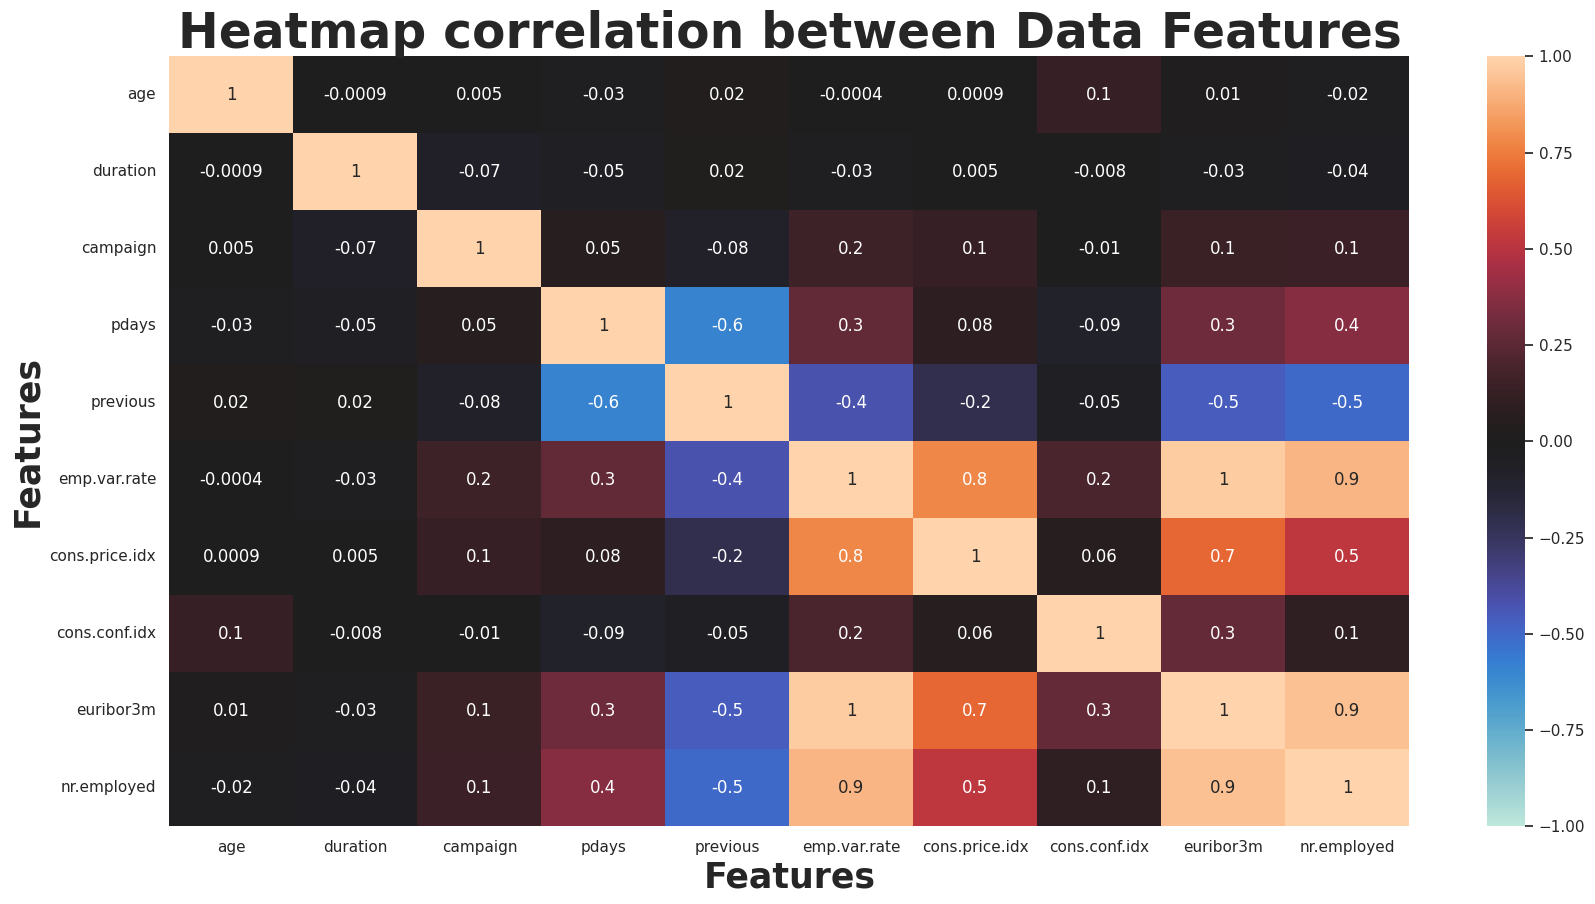

In [16]:
# using heatmap to visualize correlation between the columns
fig_size(20,10)
ax = sns.heatmap(num_data.corr(), annot=True, fmt='.1g', 
                 vmin=-1, vmax=1, center= 0)

# setting the parameters
fig_att(ax, "Heatmap correlation between Data Features", 
        "Features", "Features", 35, 25, "bold")


#saving the figure
save('data_heatmap')
plt.show()

### Outliers

In [17]:
# Copying the dataset to a new df to handle outliers
dataset_new = df.copy(deep=True)
dataset_new.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


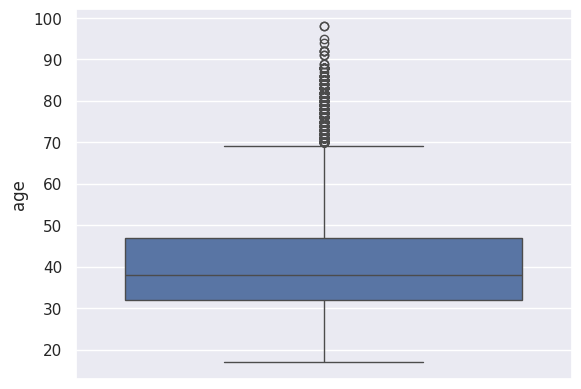

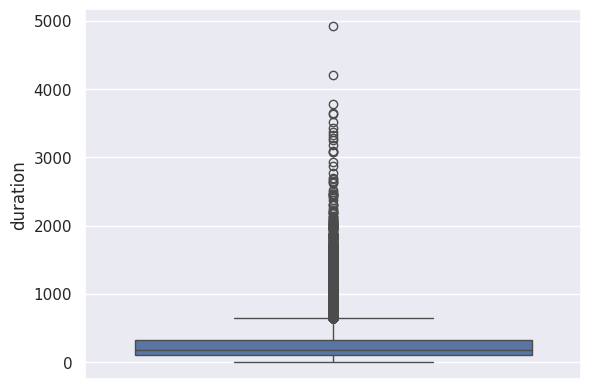

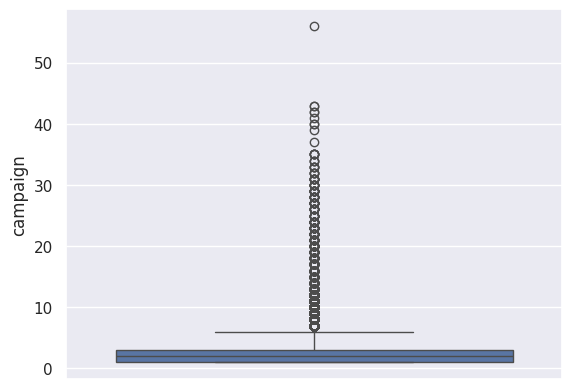

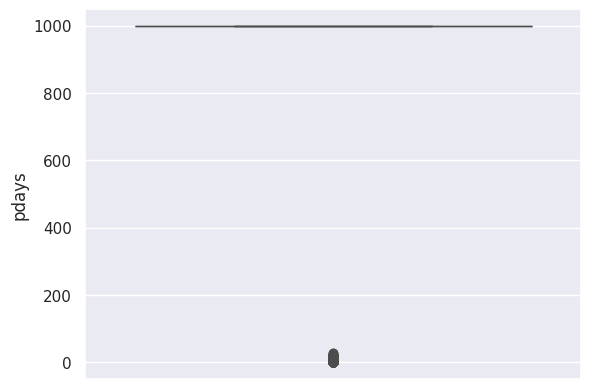

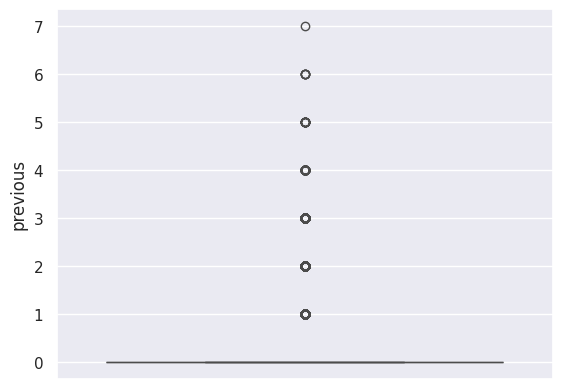

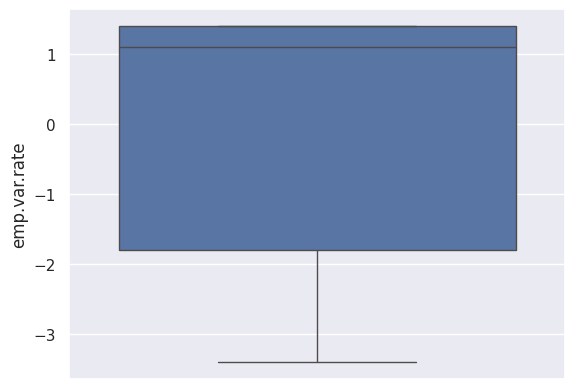

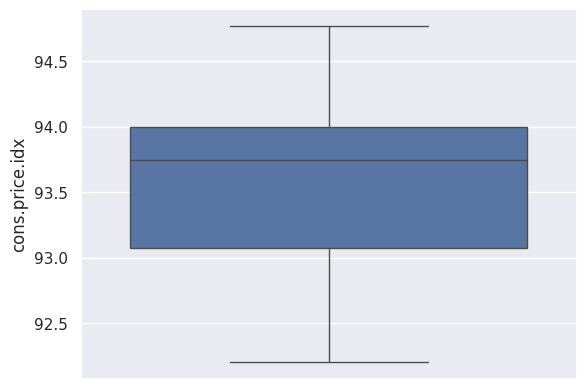

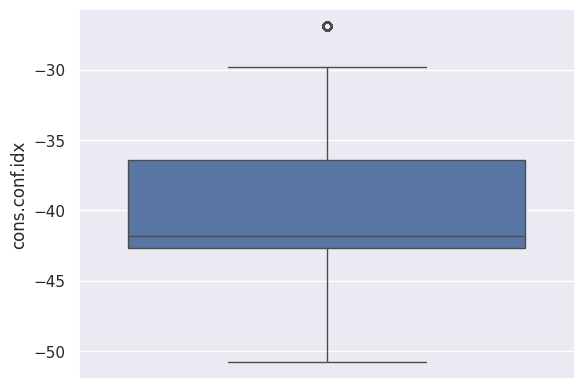

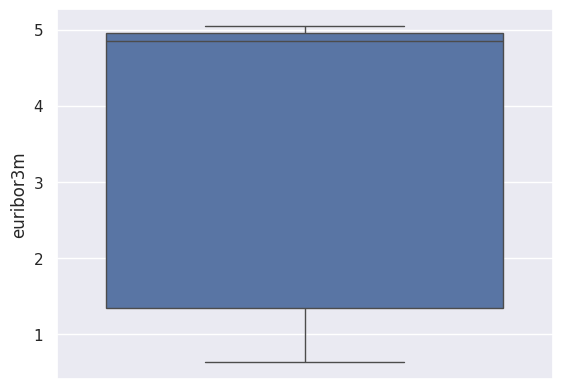

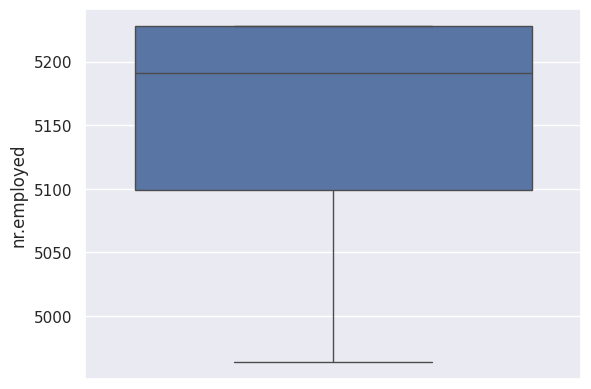

In [18]:
# Using boxplot to identify outliers
for col in num_data:
    ax = sns.boxplot(num_data[col])
    save(f"{col}")
    plt.show()

In [19]:
# treating outliers
count = 1
for col in num_data:
    Q1 = num_data[col].quantile(0.25)
    Q3 = num_data[col].quantile(0.75)
    IQR = Q3 - Q1
    print(f'column {count}: {num_data[col].name}\n------------------------')
    print('1st quantile => ',Q1)
    print('3rd quantile => ',Q3)
    print('IQR =>',IQR)

    fence_low  = Q1-(1.5*IQR)
    print('fence_low => ' + str(fence_low))

    fence_high = Q3+(1.5*IQR)
    print('fence_high => ' + str(fence_high))
    print("\n------------------------")
    
    count = count + 1
    
    #replacing outliers with nan
    dataset_new[col][((dataset_new[col] < fence_low) |(dataset_new[col] > fence_high))] = np.nan

column 1: age
------------------------
1st quantile =>  32.0
3rd quantile =>  47.0
IQR => 15.0
fence_low => 9.5
fence_high => 69.5

------------------------
column 2: duration
------------------------
1st quantile =>  102.0
3rd quantile =>  319.0
IQR => 217.0
fence_low => -223.5
fence_high => 644.5

------------------------
column 3: campaign
------------------------
1st quantile =>  1.0
3rd quantile =>  3.0
IQR => 2.0
fence_low => -2.0
fence_high => 6.0

------------------------
column 4: pdays
------------------------
1st quantile =>  999.0
3rd quantile =>  999.0
IQR => 0.0
fence_low => 999.0
fence_high => 999.0

------------------------
column 5: previous
------------------------
1st quantile =>  0.0
3rd quantile =>  0.0
IQR => 0.0
fence_low => 0.0
fence_high => 0.0

------------------------
column 6: emp.var.rate
------------------------
1st quantile =>  -1.8
3rd quantile =>  1.4
IQR => 3.2
fence_low => -6.6000000000000005
fence_high => 6.200000000000001

------------------------
c

/tmp/ipykernel_10192/2235676988.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_new[col][((dataset_new[col] < fence_low) |(dataset_new[col] > fence_high))] = np.nan
/tmp/ipykernel_10192/2235676988.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_new[col][((dataset_new[col] < fence_low) |(dataset_new[col] > fence_high))] = np.nan
/tmp/ipykernel_10192/2235676988.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [20]:
# checking the columns which outliers were replace with nan
print(dataset_new.select_dtypes(include='number').isnull().sum())

age                469
duration          2963
campaign          2406
pdays             1515
previous          5625
emp.var.rate         0
cons.price.idx       0
cons.conf.idx      447
euribor3m            0
nr.employed          0
dtype: int64


In [21]:
# Dealing with the nan values

# mode
columns_mode = ['age', 'pdays']
for col in columns_mode:
    dataset_new[col].fillna(dataset_new[col].mode()[0], inplace=True)
    
# median
columns_median = ['duration', 'campaign', 'previous', 'cons.conf.idx']
for col in columns_median:
    dataset_new[col].fillna(dataset_new[col].median(), inplace=True)

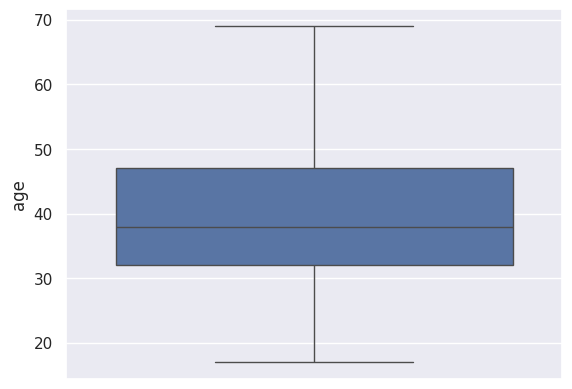

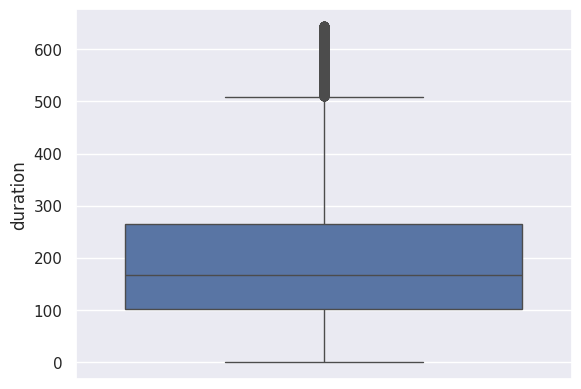

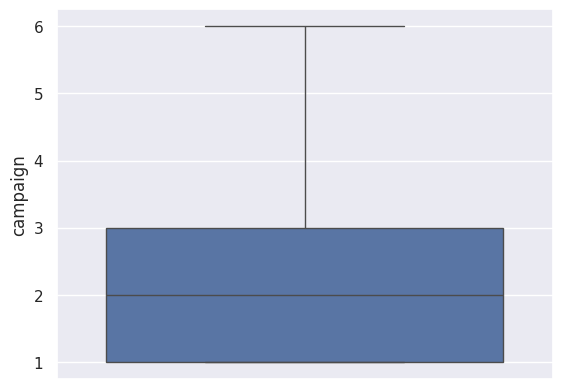

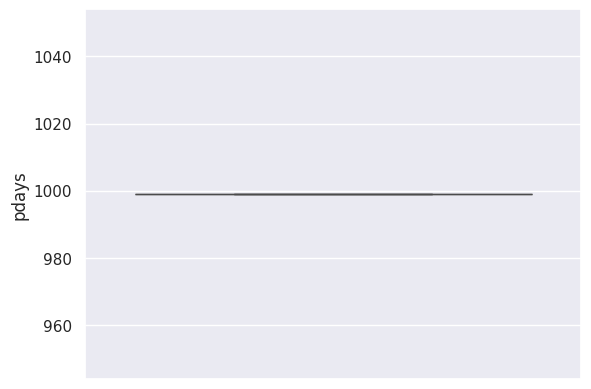

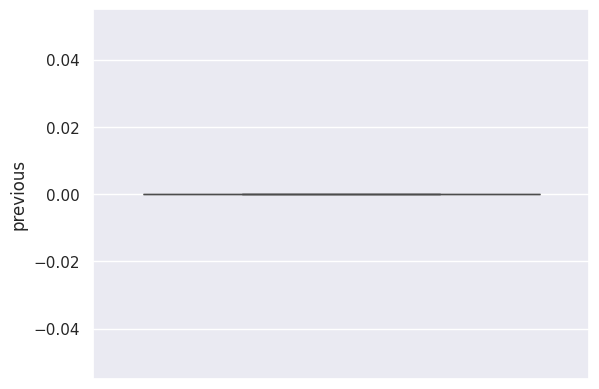

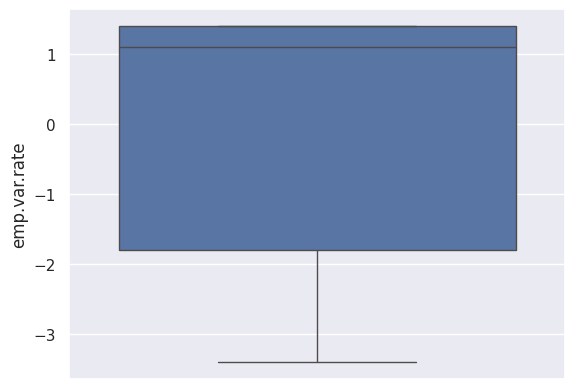

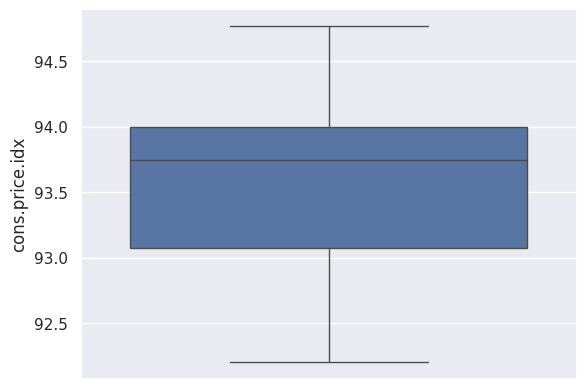

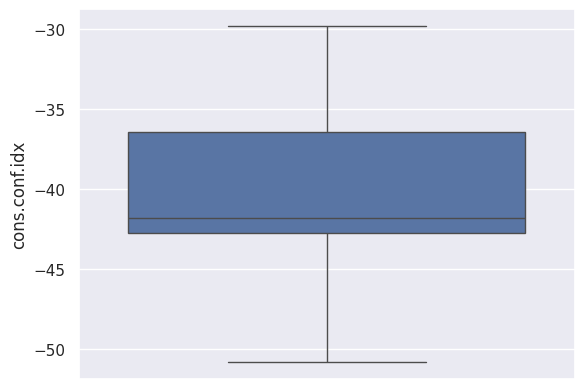

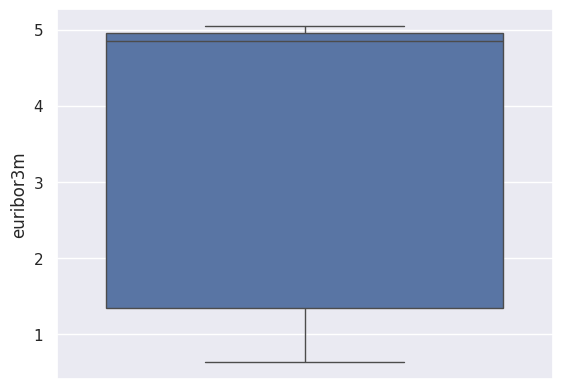

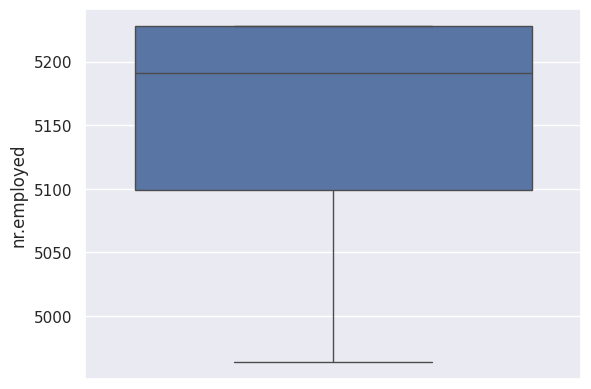

In [22]:
# Checking if outliers has been removed
for col in dataset_new.select_dtypes(include='number'):
    ax = sns.boxplot(dataset_new.select_dtypes(include='number')[col])
    save(f"{col}2")
    plt.show()

In [23]:
# Exporting the dataset without outliers as csv
dataset_new.to_csv('bank-addition-full-without-outliers.csv', index=False)